In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as mp
import scipy.interpolate as spint
import scipy.stats as sstat
import os
from jupyterthemes import jtplot

In [72]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [3]:
img = mp.imread('graph-image.png')

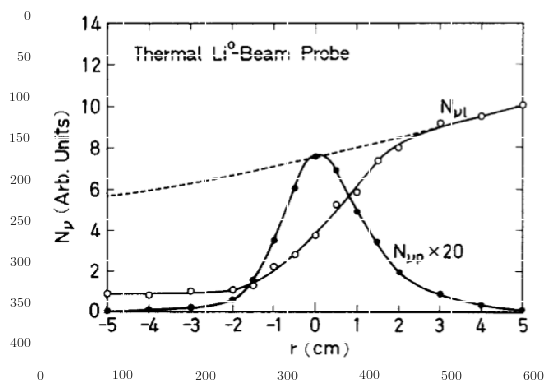

In [73]:
mp.imshow(img, 'gray')
mp.show()

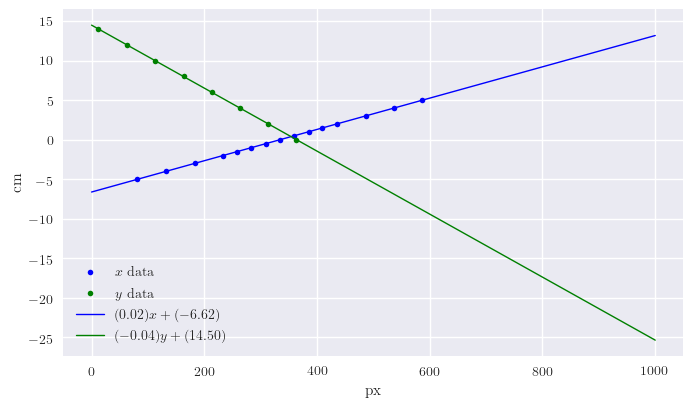

In [74]:
img_h, img_w = img.shape
x_ref, y_ref = (334, 363)
x_arr = np.array([ 81, 132, 183, 234, 258, 283, 309, 334, 360, 385, 409, 436, 486, 536, 586])
x_true = np.array([-5,  -4,  -3,  -2, -1.5, -1, -0.5, 0,  0.5,   1, 1.5,   2,   3,   4,   5])
y_ax = np.array([363,  313, 264, 214, 164, 113, 62, 12])
y_true = np.array([ 0,   2,   4,   6,   8,  10, 12, 14])

mx, bx, _, _, _ = sstat.linregress(x_arr, x_true)
my, by, _, _, _ = sstat.linregress(y_ax, y_true)
x_tendrange = np.linspace(0, 1000)
y_tendrange = np.linspace(0, 1000)
cal_curvex = lambda x: mx*x + bx  # pixel values as input
cal_curvey = lambda x: my*x + by
cm_h = cal_curvey(img_h)
cm_w = cal_curvex(img_w)

mp.plot(x_arr, x_true, 'bo', ms=4, label='$x$ data')
mp.plot(y_ax, y_true, 'go', ms=4, label='$y$ data')
mp.plot(x_tendrange, mx*x_tendrange+bx, 'b-', lw=1, label='$({:.2f})x + ({:.2f})$'.format(mx, bx))
mp.plot(y_tendrange, my*y_tendrange+by, 'g-', lw=1, label='$({:.2f})y + ({:.2f})$'.format(my, by))
mp.xlabel('px')
mp.ylabel('cm')
mp.legend()

# mp.savefig('calibration_curves.png', dpi=300, bbox_inches='tight')
mp.show()

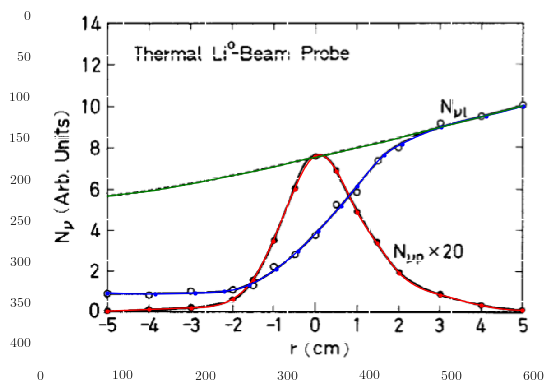

In [75]:
mp.figure()
mp.imshow(img, 'gray')

# bell curve
y_arr = np.array([362, 360, 358, 347, 324, 276, 213, 173, 191, 241, 279, 315, 342, 355, 361])
y_bell = y_arr.copy()
y_px = y_ref - y_arr
x_tend = np.linspace(x_arr.min(), x_arr.max(), 300)
spl = spint.make_interp_spline(x_arr, y_arr, k=3)
dist_smooth = spl(x_tend)
x_bell_smooth = x_tend.copy()
y_bell_smooth = dist_smooth.copy()
mp.plot(x_arr, y_arr, 'ro', ms=3)
mp.plot(x_tend, dist_smooth, 'r-', lw=1)

# sigmoid
x_arr = np.array([ 81, 139, 188, 223, 254, 286, 313, 338, 365, 385, 418, 440, 487, 542, 587])
x_sig = x_arr.copy()
y_arr = np.array([340, 341, 340, 338, 330, 311, 289, 264, 234, 210, 172, 158, 138, 124, 112])
y_sig = y_arr.copy()
x_tend = np.linspace(x_arr.min(), x_arr.max(), 300)
spl = spint.make_interp_spline(x_arr, y_arr, k=3)
dist_smooth = spl(x_tend)
x_sig_smooth = x_tend.copy()
y_sig_smooth = dist_smooth.copy()
mp.plot(x_arr, y_arr, 'bo', ms=3)
mp.plot(x_tend, dist_smooth, 'b-', lw=1)

# line
x_arr = np.array([ 81, 139, 188, 223, 254, 286, 313, 338, 365, 385, 418, 440, 487, 542, 587])
x_l = x_arr.copy()
y_arr = np.array([222, 215, 206, 199, 193, 186, 179, 174, 168, 163, 156, 150, 138, 124, 112])
y_l = y_arr.copy()
mp.plot(x_arr, y_arr, 'g-', lw=1)

mp.show()

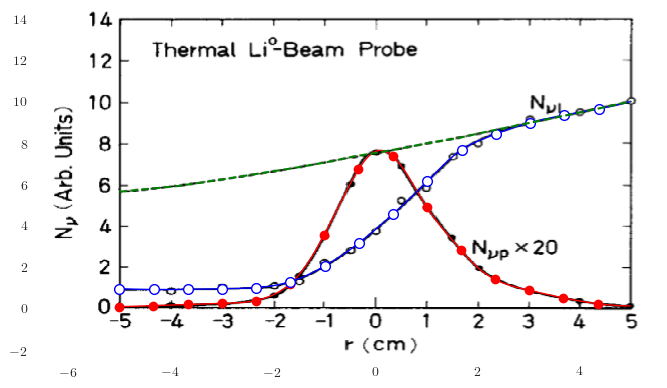

In [76]:
mp.figure()
x_leftedge = cal_curvex(81)
mp.imshow(img, 'gray', aspect='auto', extent=[cal_curvex(0), cal_curvex(img_w), cal_curvey(img_h), cal_curvey(0)])

# bell curve
x_bell_smooth_sc = cal_curvex(x_bell_smooth)
y_bell_smooth_sc = cal_curvey(y_bell_smooth)
mp.plot(x_bell_smooth_sc, y_bell_smooth_sc, 'r-', lw=1)
mp.plot(x_bell_smooth_sc[::20], y_bell_smooth_sc[::20], 'ro')

# sigmoid
x_sig_smooth_sc = cal_curvex(x_sig_smooth)
y_sig_smooth_sc = cal_curvey(y_sig_smooth)
mp.plot(x_sig_smooth_sc, y_sig_smooth_sc, 'b-', lw=1)
mp.plot(x_sig_smooth_sc[::20], y_sig_smooth_sc[::20], 'o', mew=1, mec='b', mfc='w')

#line
x_l_smooth_sc = cal_curvex(x_l)
y_l_smooth_sc = cal_curvey(y_l)
mp.plot(x_l_smooth_sc, y_l_smooth_sc, 'g--', lw=1.5)

mp.grid(False)
# mp.savefig('final_overlay.png', dpi=300, bbox_inches='tight')
mp.show()